In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")
pd.set_option('display.max_columns',None)
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [3]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

****
## Data Visualization ##
****

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

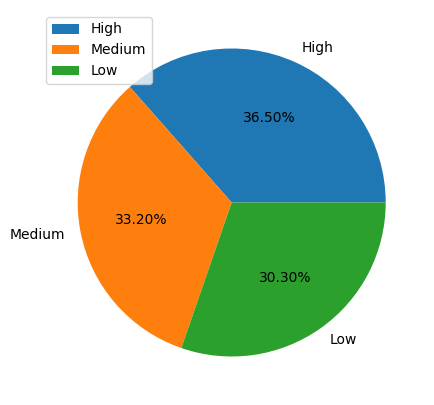

In [6]:
#Let us see how are target variable is distributed in the dataset
tdf=df['Level'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['Level'],autopct='%.2f%%')
plt.legend(tdf['Level'])
plt.show()

1. Our classes in the target variable is distributed almost equally with no bias towards one particular class.
2. Our Dataset is balanced :)

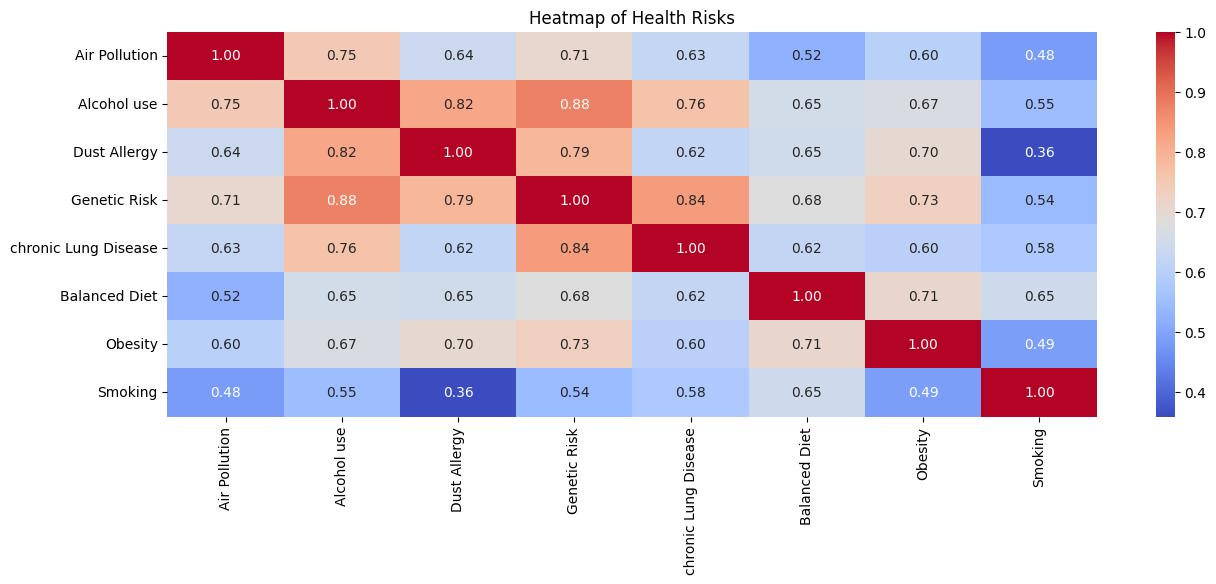

In [7]:
#Let us look how some of the Risk, Allergies and behavious are related to each other
corr=df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk', 
            'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Health Risks')
plt.show()

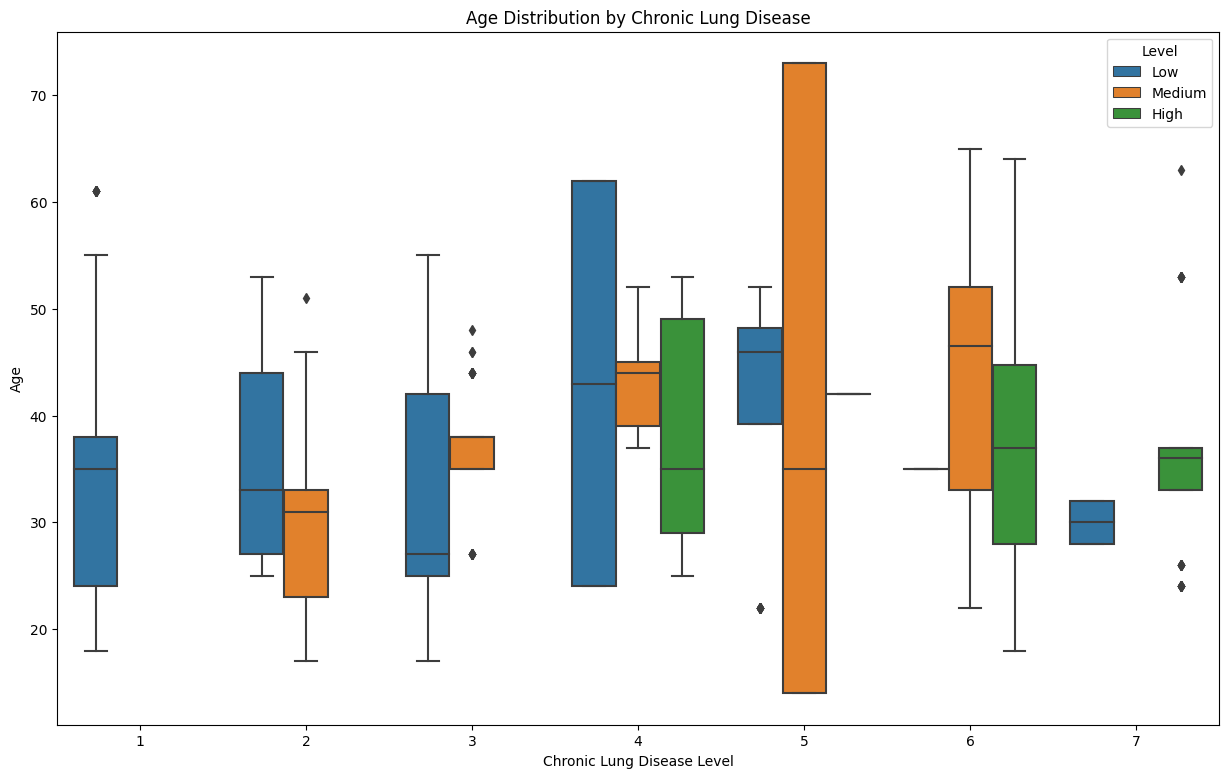

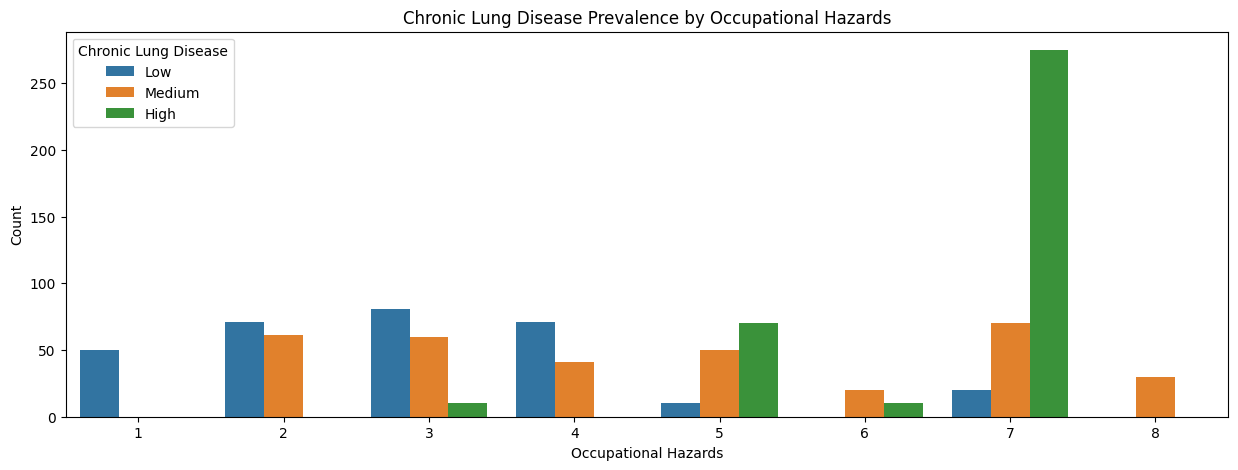

In [8]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=df,x='chronic Lung Disease',y='Age',hue='Level')
plt.title('Age Distribution by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease Level')
plt.ylabel('Age')
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df,x='OccuPational Hazards',hue='Level')
plt.title('Chronic Lung Disease Prevalence by Occupational Hazards')
plt.xlabel('Occupational Hazards')
plt.ylabel('Count')
plt.legend(title='Chronic Lung Disease')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


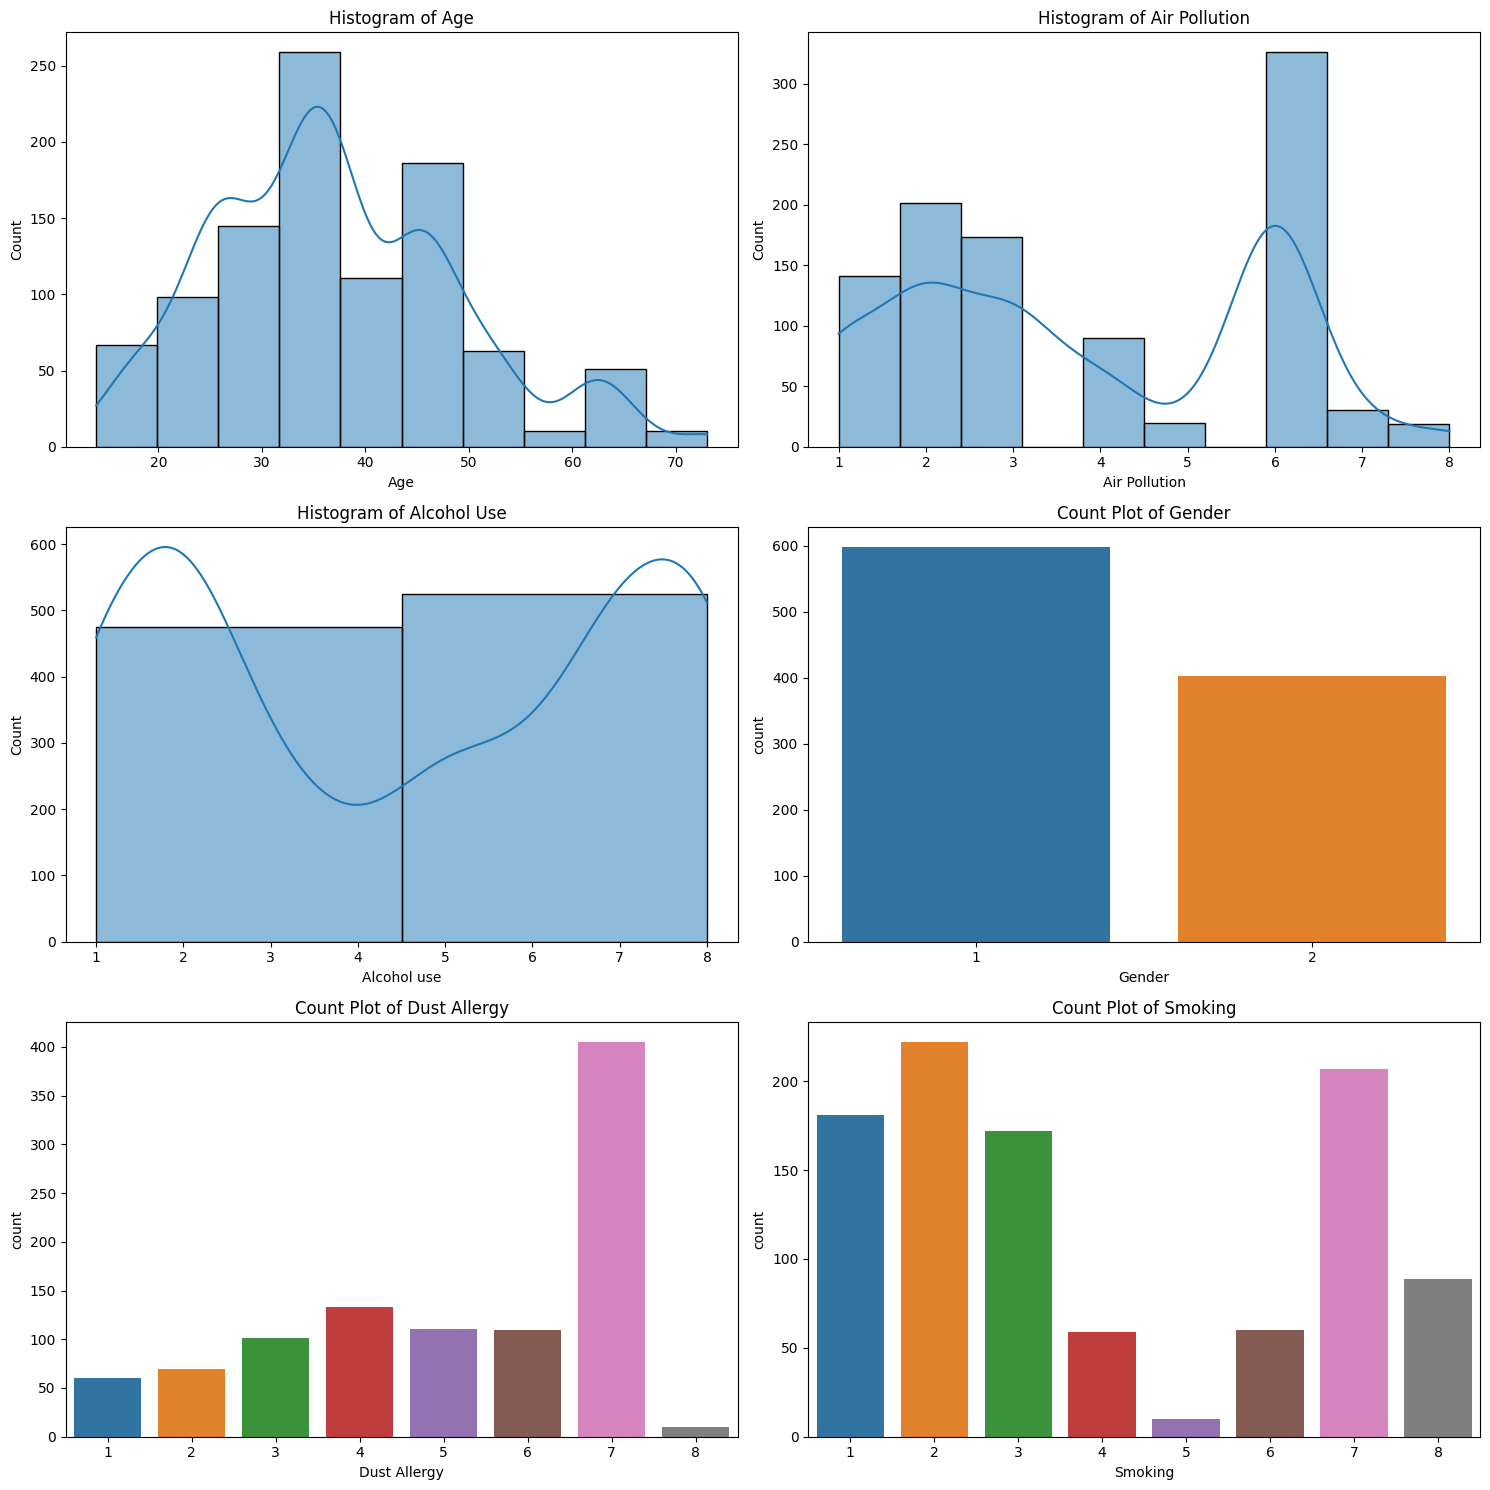

In [9]:
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age')
sns.histplot(df['Air Pollution'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Air Pollution')
sns.histplot(df['Alcohol use'], bins=2, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Alcohol Use')
sns.countplot(x='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count Plot of Gender')
sns.countplot(x='Dust Allergy', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Count Plot of Dust Allergy')
sns.countplot(x='Smoking', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Count Plot of Smoking')
plt.tight_layout()
plt.show()

****
## Data Preprocessing ##
****

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [11]:
# checking for null values
df.isnull().any()

index                       False
Patient Id                  False
Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

In [12]:
# Dropping Unwanted columns
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [13]:
#Encoding target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

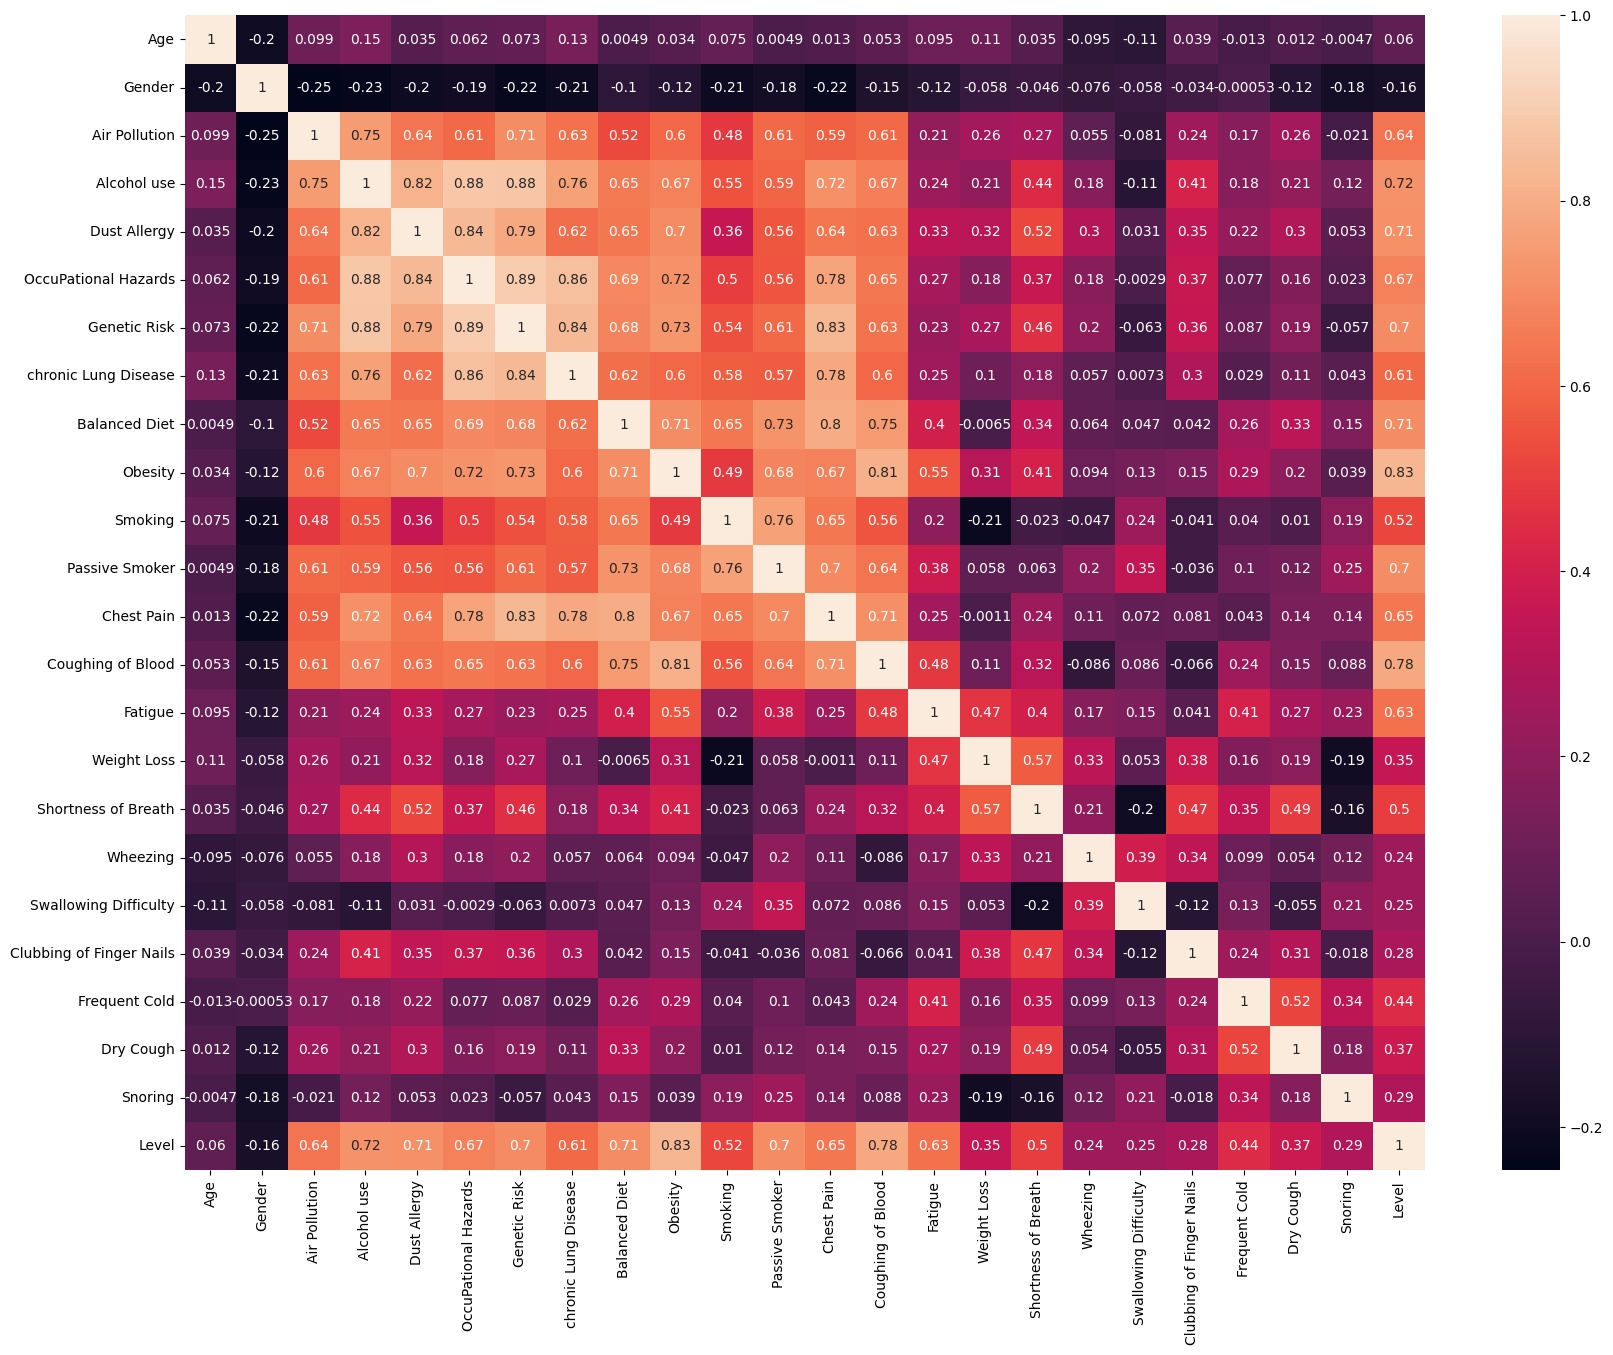

In [15]:
# Finding correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cbar='magma')
plt.show()

In [16]:
# Splitting the Target column from the original dataset
x=df.drop(columns='Level')
y=df['Level']

# Calculating Mutual Information for capturing both linear and non-linear relationship
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0                    Obesity            0.528517
1             Passive Smoker            0.511944
2          Coughing of Blood            0.458304
3               Dust Allergy            0.376362
4                   Wheezing            0.357407
5               Genetic Risk            0.356937
6                Alcohol use            0.341191
7              Balanced Diet            0.323048
8       OccuPational Hazards            0.322053
9                 Chest Pain            0.316699
10      chronic Lung Disease            0.311111
11             Air Pollution            0.293736
12                   Fatigue            0.270201
13                   Smoking            0.226484
14       Shortness of Breath            0.200970
15             Frequent Cold            0.183754
16  Clubbing of Finger Nails            0.148696
17                 Dry Cough            0.140264
18               Weight Loss            0.098068
19                  

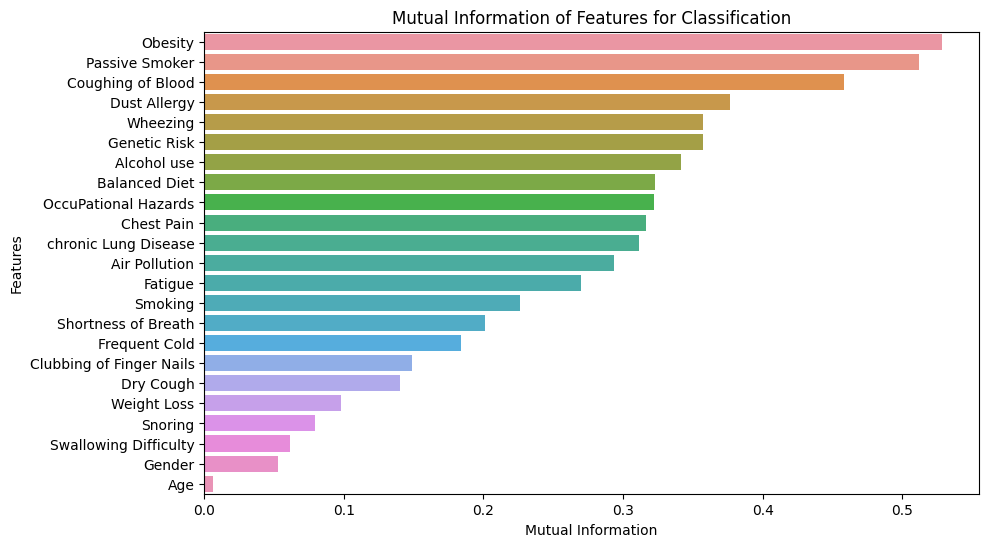

In [17]:
#Plotting Mutual Information for better understanding
plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [18]:
# Splitting the data into Training (75%) and Testing (25%)
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
## Models ##
****

In [19]:
#importing
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [20]:
cm_t=[] #To store confusion matrices for training set
cm=[] #To store confusion matrices for testing set

## Models - K Nearest Neighbors ##

In [21]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,n_jobs=-1,random_state=20,scoring='accuracy',param_distributions=params,cv=10) #Finding Best K
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_

{'n_neighbors': 6}
0.9973333333333333


In [22]:
pred_t=nknn.predict(x_t)
pred=nknn.predict(x_te)  #Predicting on the testing set
print('KNN Training Accuracy: ',accuracy_score(y_t,pred_t))
print('KNN Testing Accuracy: ',accuracy_score(y_te,pred))
print('\nClassification Report for KNN Classifier:\n\n ',classification_report(y_te,pred))
cmk_t=confusion_matrix(y_t,pred_t)
cm_t.append(cmk_t)
cmk=confusion_matrix(y_te,pred)
cm.append(cmk)

KNN Training Accuracy:  0.9973333333333333
KNN Testing Accuracy:  1.0

Classification Report for KNN Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## Models - Decision Tree Classifier ##

In [23]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t) 
alphas=path.ccp_alphas 
params={'ccp_alpha':alphas}
ndt=GridSearchCV(dt,param_grid=params,n_jobs=-1,scoring='accuracy',cv=10)  # Finding Best Alpha
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0}
1.0


In [24]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
# Hyper Parameter Tuning -> We can use more parameters, descriptions of each paramter is available in the Decision Tree Documentation
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,scoring='accuracy',random_state=42,n_jobs=-1,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy'}
0.9946666666666667


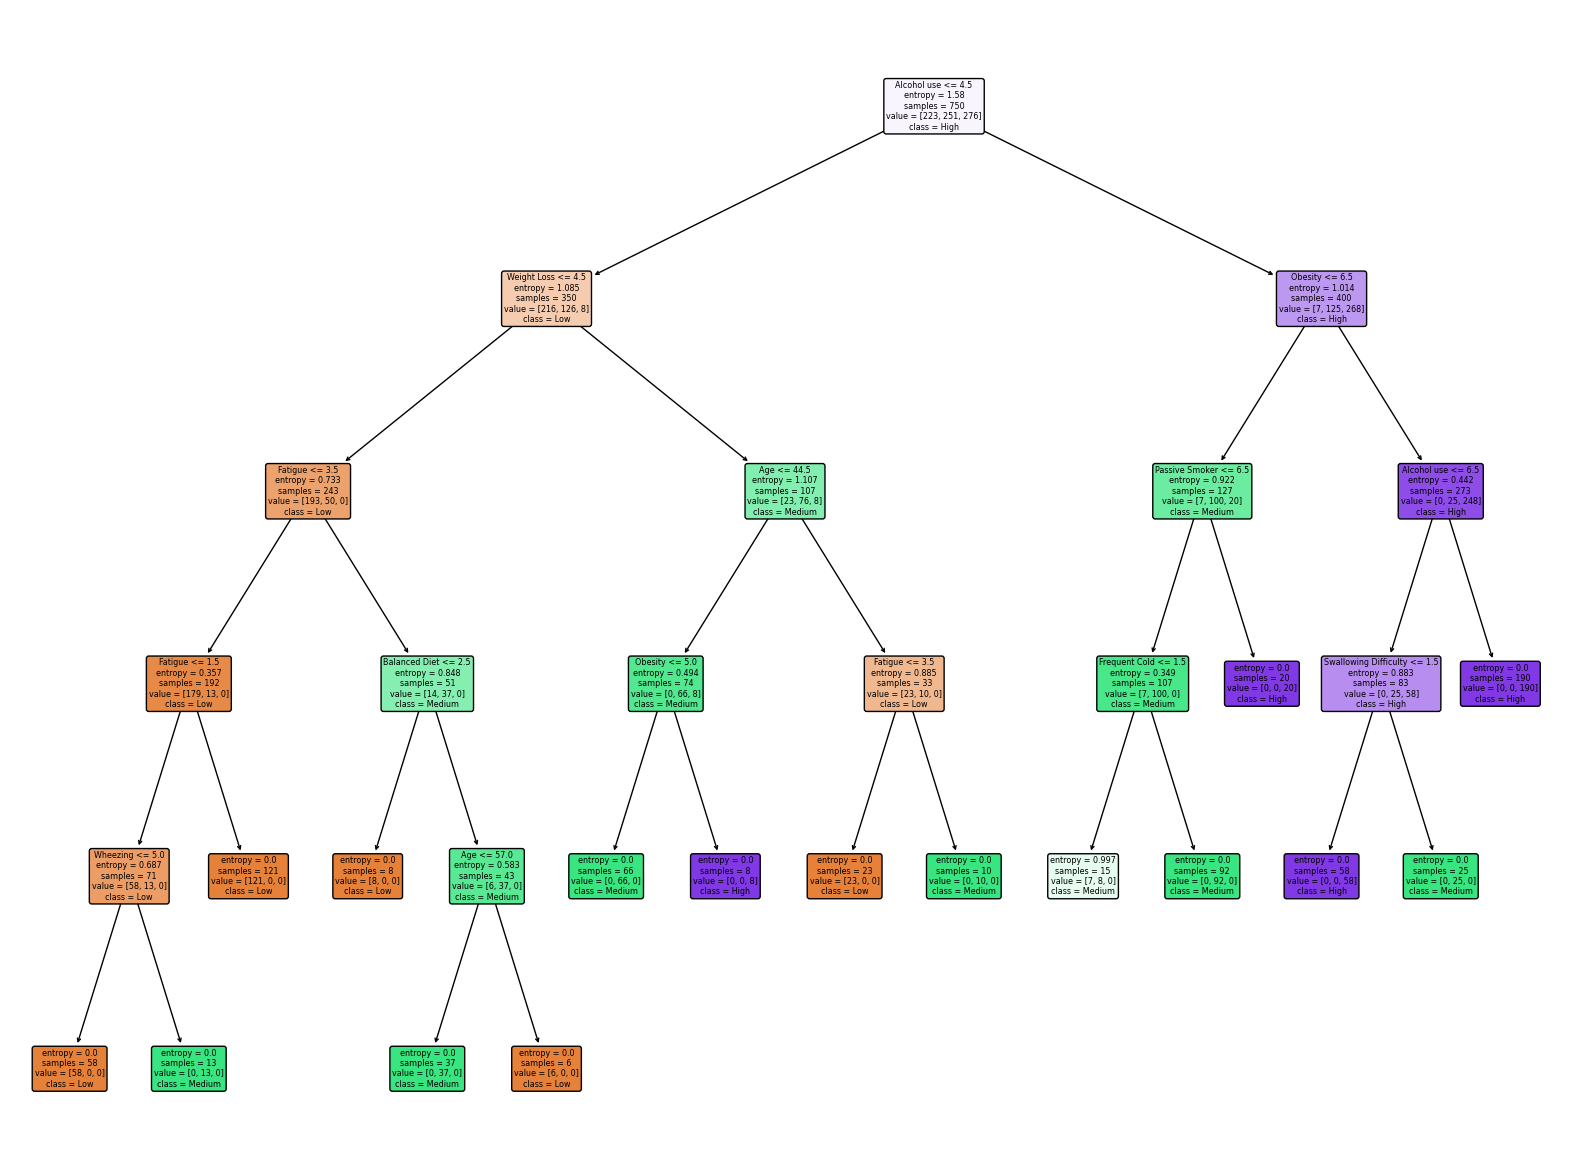

In [25]:
# Let us Look at the Decision Treee
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,feature_names=x_t.columns, class_names=['Low', 'Medium','High'],rounded=True)
plt.show()

In [26]:
pred1_t=ndt.predict(x_t)
pred1=ndt.predict(x_te)  #Predicting on the testing set
print('Decision Tree Classifier Training Accuracy: ',accuracy_score(y_t,pred1_t))
print('Decision Tree Classifier Testing Accuracy: ',accuracy_score(y_te,pred1))
print('\nClassification Report for Decision Tree Classifier Classifier:\n\n ',classification_report(y_te,pred1))
cmdt_t=confusion_matrix(y_t,pred1_t)
cm_t.append(cmdt_t)
cmdt=confusion_matrix(y_te,pred1)
cm.append(cmdt)

Decision Tree Classifier Training Accuracy:  0.9906666666666667
Decision Tree Classifier Testing Accuracy:  0.988

Classification Report for Decision Tree Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      0.96      0.98        80
           1       0.96      1.00      0.98        81
           2       1.00      1.00      1.00        89

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



## Models - Random Forest Classifier ##

In [27]:
rf=RandomForestClassifier()
# Hyper Parameter Tuning -> We can use more parameters, descriptions of each paramter is available in the Random Forest Classifier Documentation
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_features':['sqrt','log2',None],'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,scoring='accuracy',random_state=42,n_jobs=-1,cv=10)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 27, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'entropy'}
1.0


In [28]:
pred2_t=nrf.predict(x_t)
pred2=nrf.predict(x_te)  #Predicting on the testing set
print('Random Forest Classifier Training Accuracy: ',accuracy_score(y_t,pred2_t))
print('Random Forest Classifier Testing Accuracy: ',accuracy_score(y_te,pred2))
print('\nClassification Report for Random Forest Classifier Classifier:\n\n ',classification_report(y_te,pred2))
cmrf_t=confusion_matrix(y_t,pred2_t)
cm_t.append(cmrf_t)
cmrf=confusion_matrix(y_te,pred2)
cm.append(cmrf)

Random Forest Classifier Training Accuracy:  1.0
Random Forest Classifier Testing Accuracy:  1.0

Classification Report for Random Forest Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## Models - AdaBoost Classifier ##

In [29]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [300],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 300, 'learning_rate': 0.25}
0.9973333333333333


In [30]:
pred3_t=nada.predict(x_t)
pred3=nada.predict(x_te)
print('AdaBoost Classifier Training Accuracy: ',accuracy_score(y_t,pred3_t))
print('Adaboost Classifier Testing Accuracy: ',accuracy_score(y_te,pred3))
print('\nClassification Report for Random Forest Classifier Classifier:\n\n ',classification_report(y_te,pred2))
cmada_t=confusion_matrix(y_t,pred3_t)
cm_t.append(cmada_t)
cmada=confusion_matrix(y_te,pred3)
cm.append(cmada)

AdaBoost Classifier Training Accuracy:  1.0
Adaboost Classifier Testing Accuracy:  1.0

Classification Report for Random Forest Classifier Classifier:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## Training and Testing Scores for all the Models ##

In [31]:
tdf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t),accuracy_score(y_t,pred3_t)],
                  'Training Precision':[precision_score(y_t,pred_t,average='macro'),precision_score(y_t,pred1_t,average='macro'),precision_score(y_t,pred2_t,average='macro'),precision_score(y_t,pred3_t,average='macro')],
                  'Training Recall':[recall_score(y_t,pred_t,average='macro'),recall_score(y_t,pred1_t,average='macro'),recall_score(y_t,pred2_t,average='macro'),recall_score(y_t,pred3_t,average='macro')],
                  'Training F1 Score':[f1_score(y_t,pred_t,average='macro'),f1_score(y_t,pred1_t,average='macro'),f1_score(y_t,pred2_t,average='macro'),f1_score(y_t,pred3_t,average='macro')]})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,KNN,0.997333,0.997365,0.997010,0.997176
1,Decision Tree Classifier,0.990667,0.990956,0.989537,0.990101
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
3,AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000


In [32]:
tedf=pd.DataFrame({'Classification Algorithms':['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1),accuracy_score(y_te,pred2),accuracy_score(y_te,pred3)],
                  'Testing Precision':[precision_score(y_te,pred,average='macro'),precision_score(y_te,pred1,average='macro'),precision_score(y_te,pred2,average='macro'),precision_score(y_te,pred3,average='macro')],
                  'Testing Recall':[recall_score(y_te,pred,average='macro'),recall_score(y_te,pred1,average='macro'),recall_score(y_te,pred2,average='macro'),recall_score(y_te,pred3,average='macro')],
                  'Testing F1 Score':[f1_score(y_te,pred,average='macro'),f1_score(y_te,pred1,average='macro'),f1_score(y_te,pred2,average='macro'),f1_score(y_te,pred3,average='macro')]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,KNN,1.000,1.000000,1.0000,1.00000
1,Decision Tree Classifier,0.988,0.988095,0.9875,0.98757
2,Random Forest Classifier,1.000,1.000000,1.0000,1.00000
3,AdaBoost Classifier,1.000,1.000000,1.0000,1.00000


## Confusion Matrices for all the Models ##

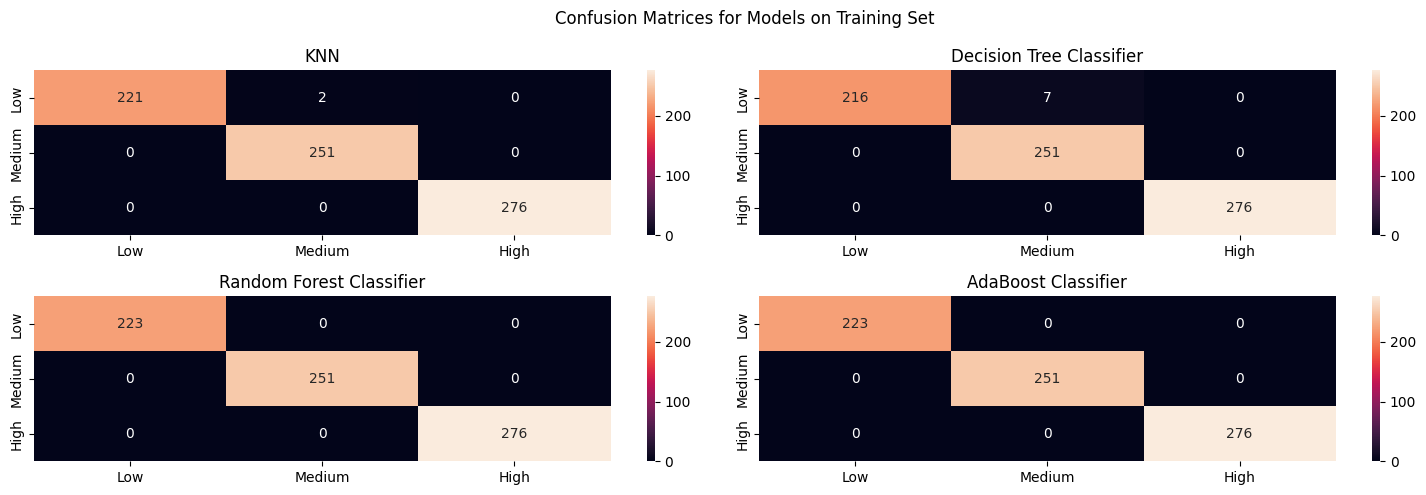

In [33]:
mods=['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier']
labels=['Low','Medium','High']
fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(mods):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c],xticklabels=labels,yticklabels=labels)
    ax[r][c].set_title(mod)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

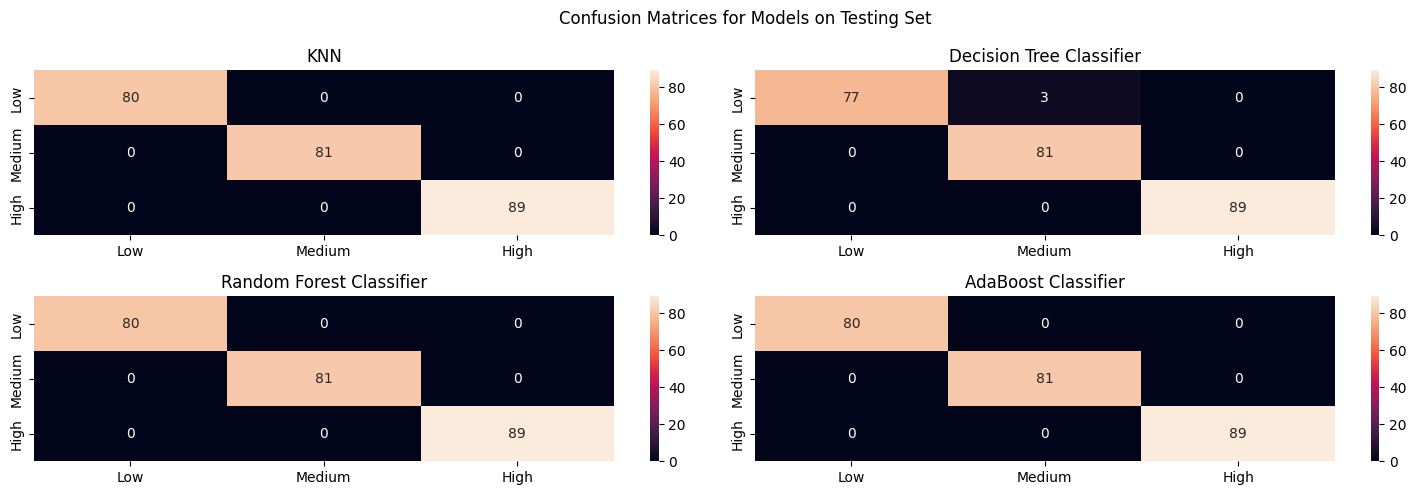

In [34]:
mods=['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier']
labels=['Low','Medium','High']
fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(mods):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c],xticklabels=labels,yticklabels=labels)
    ax[r][c].set_title(mod)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Testing Set')
plt.tight_layout()
plt.show()

## Conclusion ##

**Best Performers:** Random Forest and AdaBoost classifiers achieved perfect scores in both training and testing, indicating excellent generalization.

**KNN Performance:** KNN also performed well, with perfect testing metrics, but slightly lower training scores compared to the best models. It is still one of the best performers as it generalized the data extreamly well

**Decision Tree Limitations:** The Decision Tree Classifier showed strong training performance but lower testing accuracy. We unfortunatly Overfit :(



**Kindly provide suggestions and feedback for improving my Notebook**

**If it was helpful kindly Upvote :)**